In [5]:
import numpy as np


In [6]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [7]:
import matplotlib.pyplot as plt

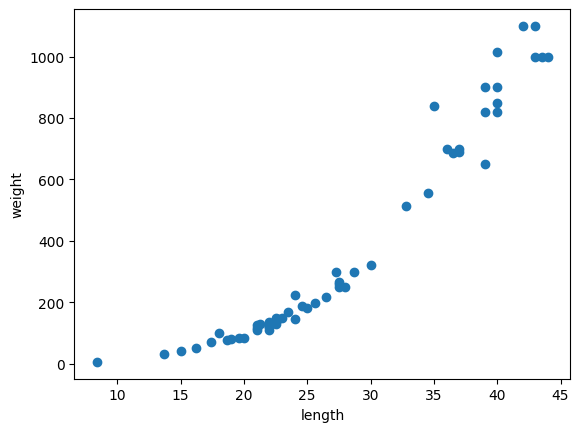

In [8]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_input, test_input, train_target, test_target=train_test_split(
    perch_length, perch_weight, random_state=42
)

In [11]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [12]:
test_array=np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [13]:
test_array=test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [14]:
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

In [15]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [16]:
from sklearn.neighbors import KNeighborsRegressor

In [17]:
knr=KNeighborsRegressor()

In [18]:
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [19]:
knr.score(test_input, test_target)

0.992809406101064

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
test_prediction=knr.predict(test_input)

mae=mean_absolute_error(test_target, test_prediction)

In [22]:
print(mae)

19.157142857142862


In [23]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [24]:
print(knr.score(test_input, test_target))

0.992809406101064


0.9852830341215901


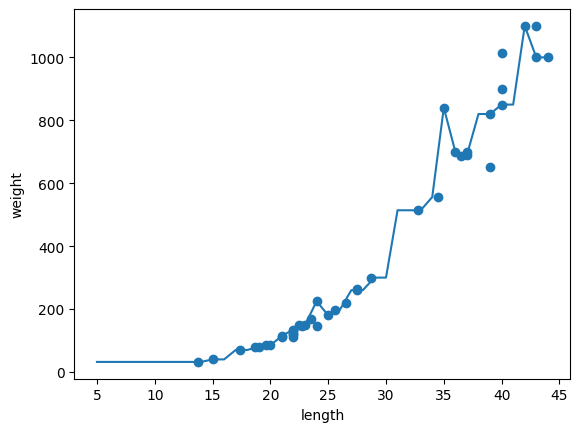

In [25]:
knr.n_neighbors=1

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
x=np.arange(5,45)
x=x.reshape(-1,1)
plt.plot(x,knr.predict(x) ,linestyle='solid')
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

0.9698823289099254


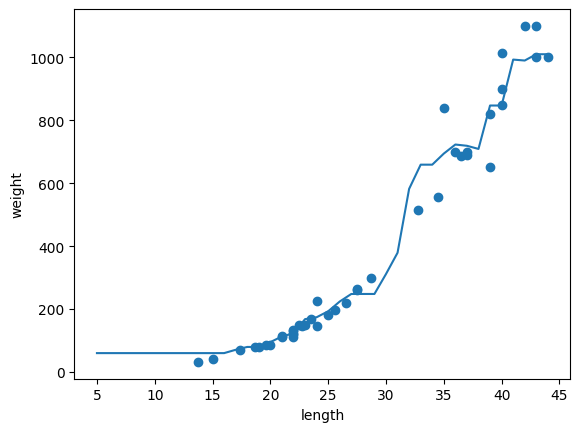

In [26]:
knr.n_neighbors=5

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
x=np.arange(5,45)
x=x.reshape(-1,1)
plt.plot(x,knr.predict(x) ,linestyle='solid')
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

0.96164569026043


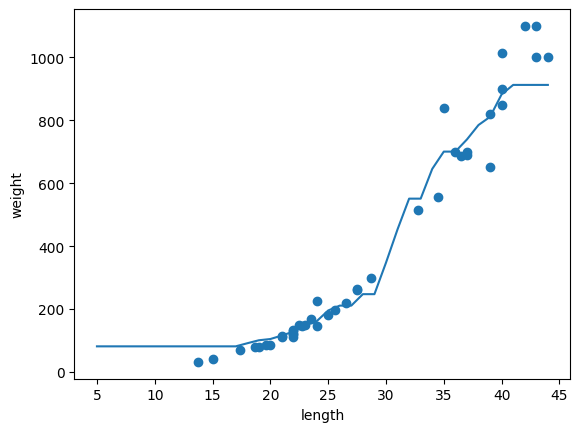

In [27]:
knr.n_neighbors=10

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
x=np.arange(5,45)
x=x.reshape(-1,1)
plt.plot(x,knr.predict(x) ,linestyle='solid')
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [28]:
from sklearn.neighbors import KNeighborsRegressor

knr= KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [29]:
print(knr.predict([[50]]))

[1033.33333333]


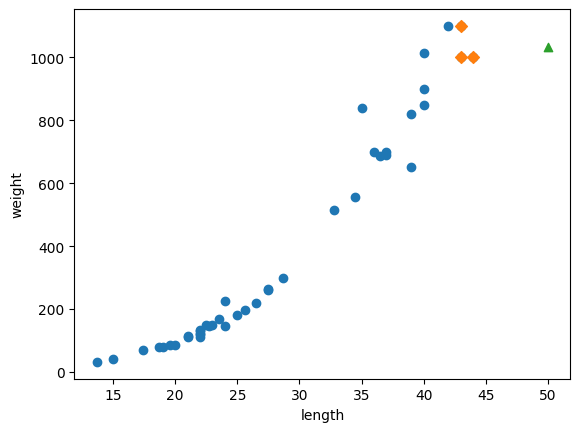

In [30]:
distances, indexes= knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [31]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [32]:
print(knr.predict([[100]]))

[1033.33333333]


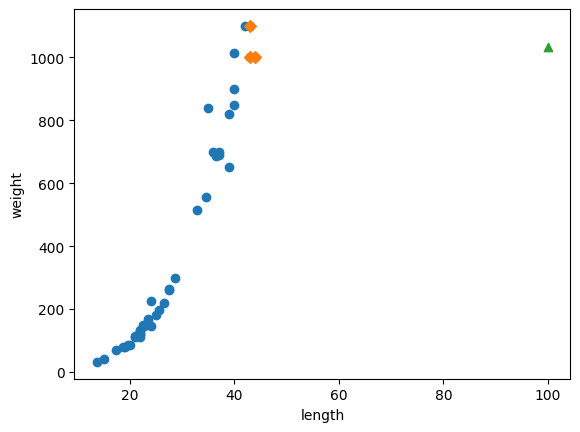

In [33]:
distances, indexes=knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_input, train_target)

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [35]:
train_poly=np.column_stack((train_input**2, train_input))
test_poly=np.column_stack((test_input**2, test_input))

In [36]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [37]:
lr=LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2,50]]))

[1573.98423528]


In [38]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


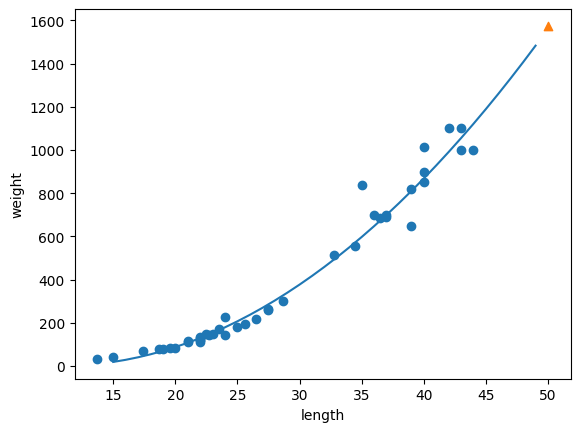

In [39]:
point=np.arange(15,50)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2-21.6*point+116.05)
plt.scatter([50],[1574],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [40]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
